In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import calendar
import bootcampviztools as bvt
import warnings 
warnings.filterwarnings('ignore')

df_vg = pd.read_csv("../data/Sales_Videogames_90-24_(Clean).csv")

In [2]:
# Se transforman los valores de ambas columnas de fechas, a un datetime
df_vg["fecha_lanzamiento"] = pd.to_datetime(df_vg["fecha_lanzamiento"])
df_vg["ultima_actualizacion"] = pd.to_datetime(df_vg["ultima_actualizacion"])

In [3]:
df_vg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60230 entries, 0 to 60229
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   titulo                  60230 non-null  object        
 1   consola                 60230 non-null  object        
 2   genero                  60230 non-null  object        
 3   editor                  60230 non-null  object        
 4   desarrollador           60230 non-null  object        
 5   puntuacion_critica      6648 non-null   float64       
 6   ventas_totales          60230 non-null  int64         
 7   ventas_na               60230 non-null  int64         
 8   ventas_japon            60230 non-null  int64         
 9   ventas_europa           60230 non-null  int64         
 10  ventas_otros            60230 non-null  int64         
 11  fecha_lanzamiento       60230 non-null  datetime64[ns]
 12  ultima_actualizacion    60230 non-null  dateti

In [4]:
df_vg.describe(include="all").T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
titulo,60230,37548,Plants vs. Zombies,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN
consola,60230,77,PC,11830,NaN,NaN,NaN,NaN,NaN,NaN,NaN
genero,60230,8,Acción,11843,NaN,NaN,NaN,NaN,NaN,NaN,NaN
editor,60230,3304,Unknown,7031,NaN,NaN,NaN,NaN,NaN,NaN,NaN
desarrollador,60230,8726,Namco Bandai Games,1441,NaN,NaN,NaN,NaN,NaN,NaN,NaN
puntuacion_critica,6648.0,NaN,NaN,NaN,7.221194,1.0,6.4,7.5,8.3,10.0,1.456204
ventas_totales,60230.0,NaN,NaN,NaN,107773.368205,0.0,0.0,0.0,20000.0,20320000.0,478784.560887
ventas_na,60230.0,NaN,NaN,NaN,54245.724473,0.0,0.0,0.0,0.0,9760000.0,248498.61541
ventas_japon,60230.0,NaN,NaN,NaN,10968.786319,0.0,0.0,0.0,0.0,2130000.0,61301.931194
ventas_europa,60230.0,NaN,NaN,NaN,31699.983297,0.0,0.0,0.0,0.0,9850000.0,191171.044547


In [5]:
# Filtrar las filas donde todas las columnas de ventas son mayores que 0 para hacer un analisis de ventas

df_vg_sales = df_vg.loc[
    (df_vg["ventas_totales"] > 0) & 
    (df_vg["ventas_na"] > 0) & 
    (df_vg["ventas_japon"] > 0) & 
    (df_vg["ventas_europa"] > 0) & 
    (df_vg["ventas_otros"] > 0)
]

df_vg_sales.describe().T

,count,mean,min,25%,50%,75%,max,std
puntuacion_critica,1061.0,7.622997,3.2,6.9,7.9,8.5,10.0,1.168049
ventas_totales,1913.0,1299200.199686,50000.0,320000.0,640000.0,1380000.0,20320000.0,1946983.851295
ventas_na,1913.0,573507.576581,10000.0,110000.0,240000.0,590000.0,9760000.0,963201.312755
ventas_japon,1913.0,115598.53633,10000.0,20000.0,60000.0,140000.0,2130000.0,175873.70016
ventas_europa,1913.0,458107.681652,10000.0,50000.0,170000.0,480000.0,9850000.0,846406.980884
ventas_otros,1913.0,152530.056979,10000.0,20000.0,60000.0,160000.0,3120000.0,277983.013545
fecha_lanzamiento,1913,2009-08-05 11:22:44.349189632,1990-01-01 00:00:00,2006-03-28 00:00:00,2010-05-18 00:00:00,2014-02-07 00:00:00,2020-12-31 00:00:00,NaN
ultima_actualizacion,1913,2010-09-15 18:59:39.299529728,1990-01-01 00:00:00,2006-05-30 00:00:00,2010-08-24 00:00:00,2018-02-07 00:00:00,2021-07-23 00:00:00,NaN


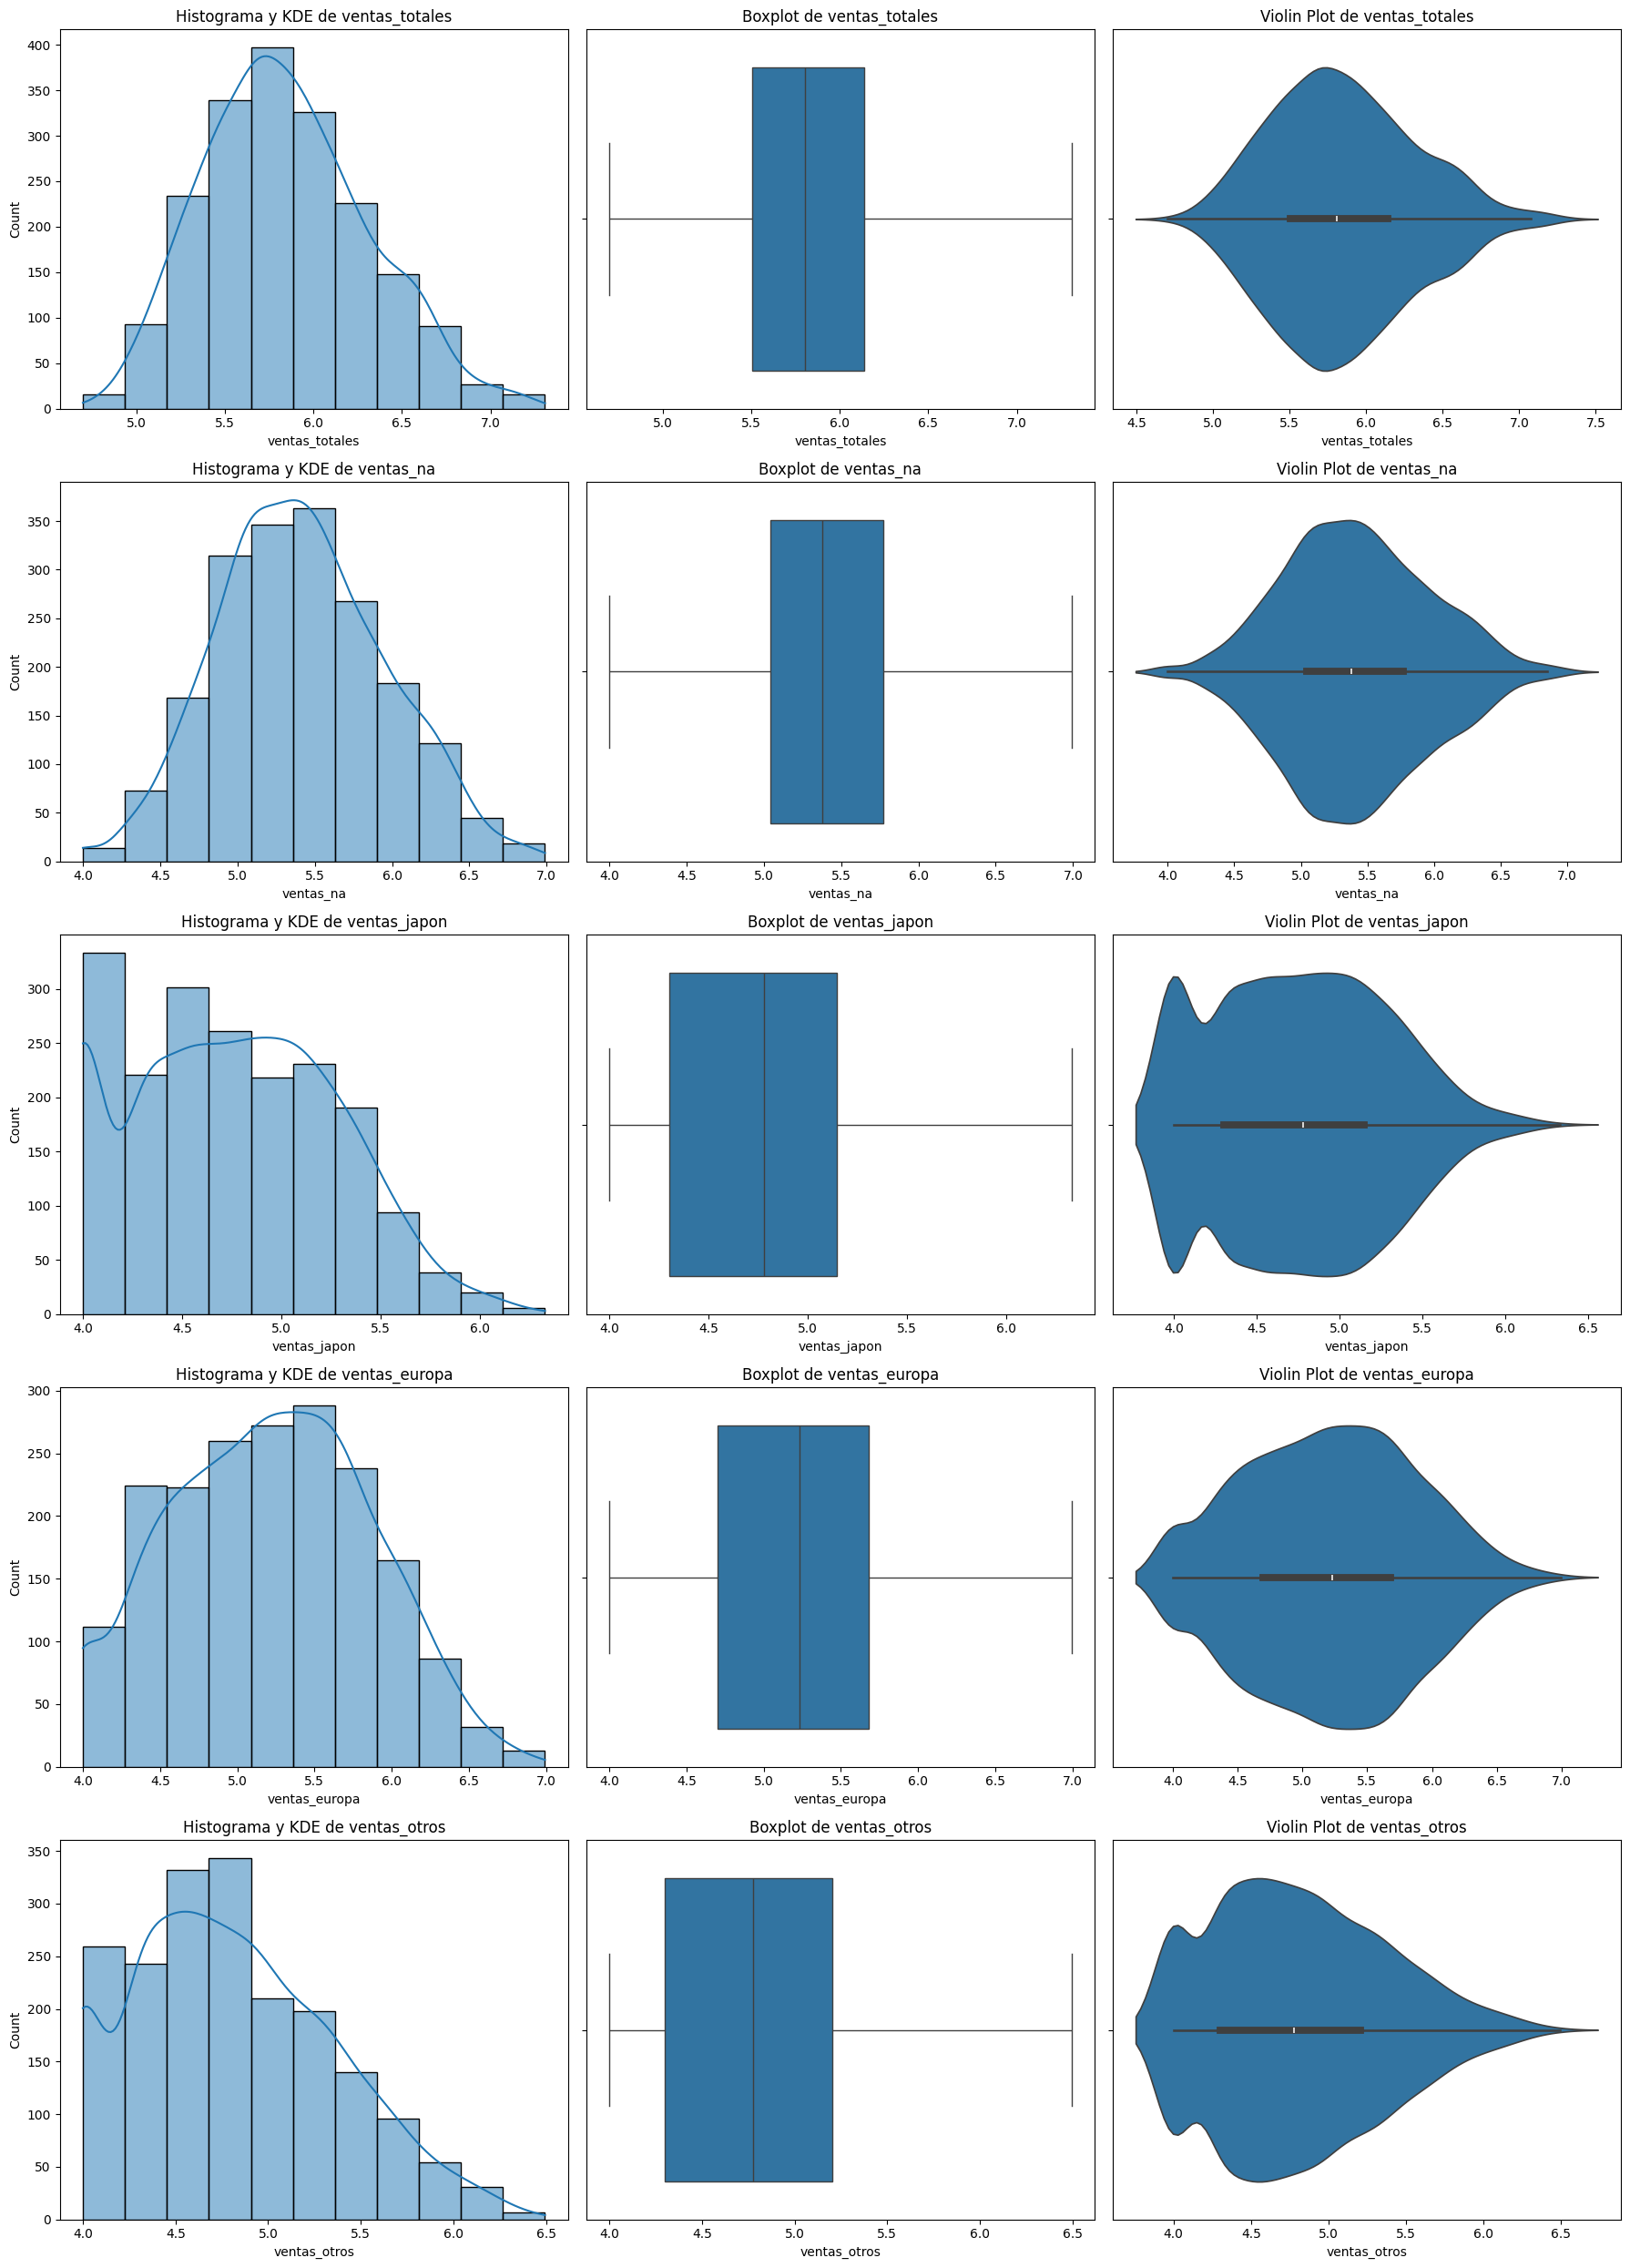

In [6]:
sales_col = ["ventas_totales", "ventas_na", "ventas_japon", "ventas_europa", "ventas_otros"]
df_vg_sales[sales_col] = df_vg_sales[sales_col].apply(np.log10)

bvt.plot_combined_graphs(df_vg_sales,
                        sales_col,
                        whisker_width= 4.5,
                        bins=11)

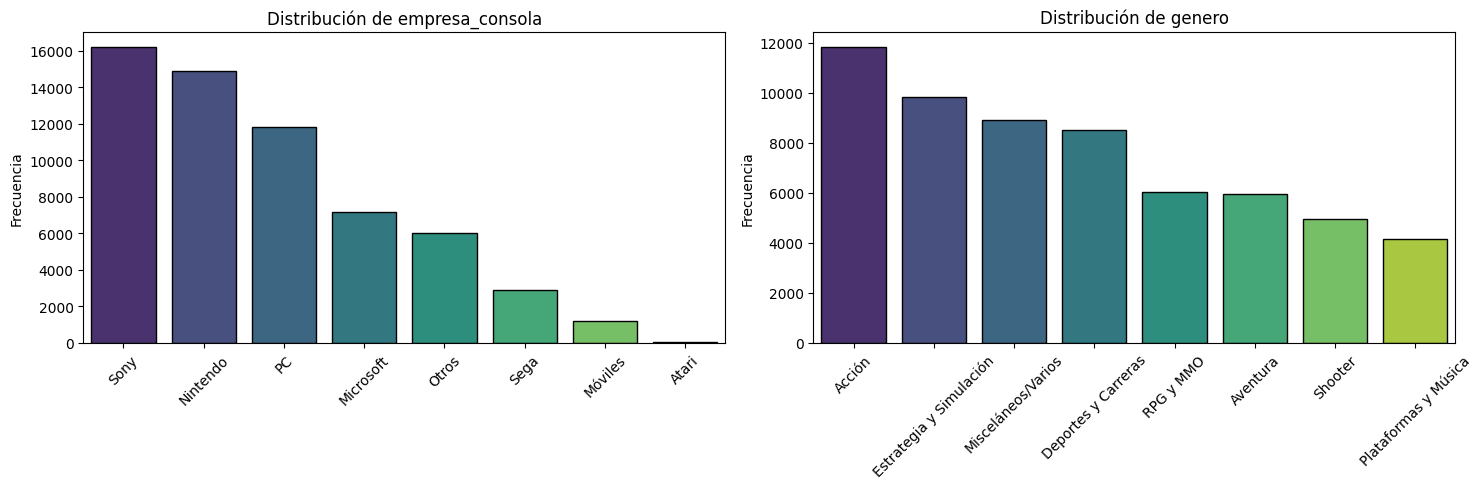

In [7]:
bvt.pinta_distribucion_categoricas(df_vg, 
                                   ["empresa_consola", "genero"], 
                                   relativa = False)

In [8]:
bvt.cardinalidad(df_vg)

,Columna,Card,%_Card,Tipo,Clasificada_como
0,titulo,37548,62.341026,object,Numerica Continua
1,consola,77,0.127843,object,Numerica Discreta
2,genero,8,0.013282,object,Categorica
3,editor,3304,5.485638,object,Numerica Discreta
4,desarrollador,8726,14.487797,object,Numerica Discreta
5,puntuacion_critica,89,0.147767,float64,Numerica Discreta
6,ventas_totales,481,0.798605,int64,Numerica Discreta
7,ventas_na,318,0.527976,int64,Numerica Discreta
8,ventas_japon,119,0.197576,int64,Numerica Discreta
9,ventas_europa,256,0.425037,int64,Numerica Discreta


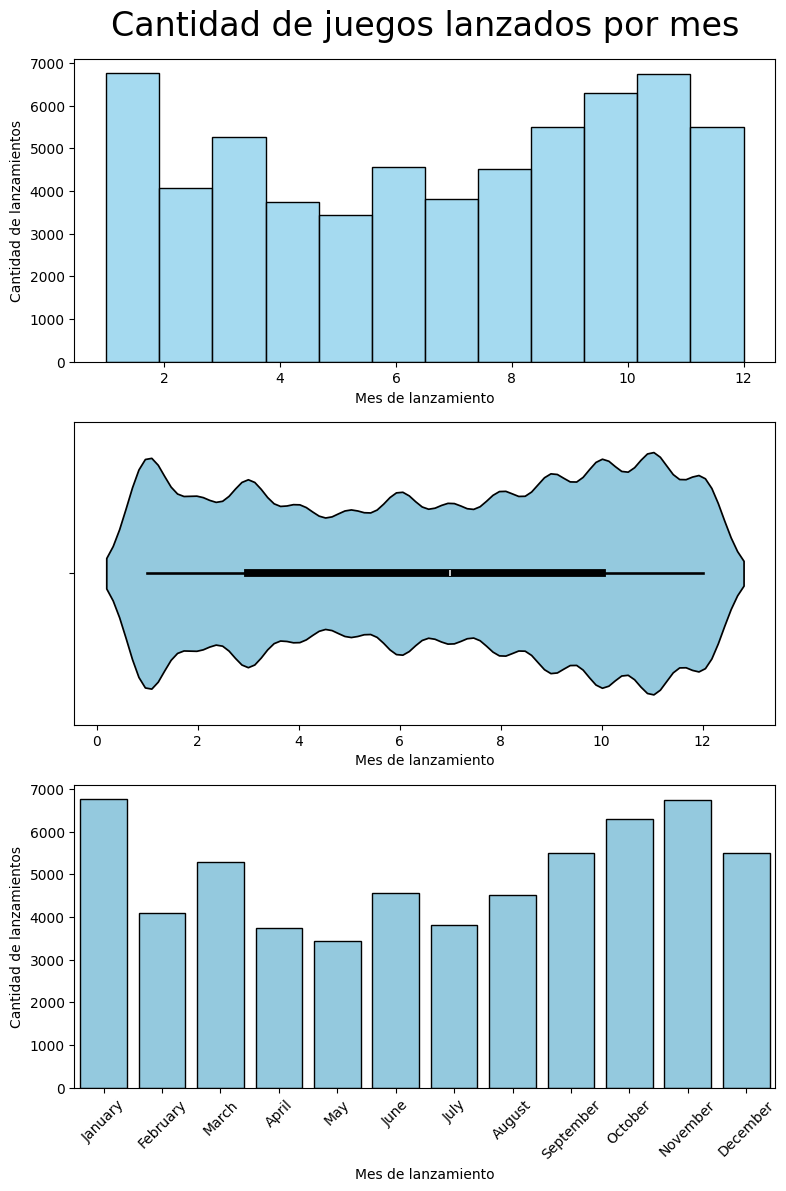

In [9]:
# Crear figura y subplots
fig, axs = plt.subplots(3, 1, figsize=(8, 12))

# Histograma
sns.histplot(data=df_vg['fecha_lanzamiento'].dt.month,
             bins=12,
             kde=False,
             color="skyblue",
             ax=axs[0])
axs[0].set_xlabel('Mes de lanzamiento')
axs[0].set_ylabel('Cantidad de lanzamientos')
axs[0].set_title('Cantidad de juegos lanzados por mes', fontsize = 24, y=1.05)

# Violín
sns.violinplot(x=df_vg['fecha_lanzamiento'].dt.month, 
               color="skyblue", 
               edgecolor="black", 
               ax=axs[1])
axs[1].set_xlabel('Mes de lanzamiento')

# Gráfico de barras
month_counts = df_vg['fecha_lanzamiento'].dt.month.value_counts().sort_index()
month_names = [calendar.month_name[i] for i in month_counts.index]
sns.barplot(x=month_names, 
            y=month_counts.values, 
            color="skyblue", 
            edgecolor="black", 
            ax=axs[2])
axs[2].set_xlabel('Mes de lanzamiento')
axs[2].set_ylabel('Cantidad de lanzamientos')
axs[2].tick_params(axis='x', rotation=45)

# Ajustar el layout para evitar solapamientos
plt.tight_layout()
plt.show()